In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression



## Q 3.1 All Student

## Question B

In [2]:
data_2019 = pd.read_csv("2019data6.csv")
data_2022 = pd.read_csv("2022data6.csv")

In [3]:
data_2019.head()

,Date,Bus pax number peak,Bus price peak,Bus pax number offpeak,Bus price offpeak,Metro pax number peak,Metro price peak,Metro pax number offpeak,Metro price offpeak
0,2019-01-02,26375,1.0,114394,1.0,5534,4.0,19470,4.0
1,2019-01-03,29376,1.0,102094,1.0,5096,4.0,18317,4.0
2,2019-01-04,26248,1.0,135108,1.0,5486,4.0,24030,4.0
3,2019-01-05,10260,1.0,94709,1.0,1563,4.0,15849,4.0
4,2019-01-06,9628,1.0,49432,1.0,1608,4.0,8007,4.0


In [4]:
data_2022.head()

,Date and time,Mode,Distance,Duration,Price
0,2022-08-01 17:31,Bus,1.3,0.04,1.0
1,2022-03-15 09:22,Bus,4.0,0.14,1.0
2,2022-05-06 15:24,Bus,1.3,0.04,1.0
3,2022-02-19 21:09,Bus,2.1,0.09,1.0
4,2022-12-20 11:23,Bus,2.4,0.09,1.0


In [5]:
data_2019.shape

(361, 9)

In [6]:
data_2022.shape

(20000, 5)

In [7]:
#statistical insights 
data_2019.describe()





,Bus pax number peak,Bus price peak,Bus pax number offpeak,Bus price offpeak,Metro pax number peak,Metro price peak,Metro pax number offpeak,Metro price offpeak
count,361.000000,361.0,361.000000,361.0,361.000000,361.0,361.000000,361.0
mean,20429.831025,1.0,85393.700831,1.0,3697.224377,4.0,14949.360111,4.0
std,8045.906384,0.0,21886.214702,0.0,1561.128622,0.0,4109.509133,0.0
min,6155.000000,1.0,33678.000000,1.0,989.000000,4.0,5293.000000,4.0
25%,9504.000000,1.0,76544.000000,1.0,1533.000000,4.0,13187.000000,4.0
50%,23686.000000,1.0,88494.000000,1.0,4330.000000,4.0,15458.000000,4.0
75%,26526.000000,1.0,97706.000000,1.0,4915.000000,4.0,17562.000000,4.0
max,35535.000000,1.0,140798.000000,1.0,5717.000000,4.0,26569.000000,4.0


In [8]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      361 non-null    object 
 1   Bus pax number peak       361 non-null    int64  
 2   Bus price peak            361 non-null    float64
 3   Bus pax number offpeak    361 non-null    int64  
 4   Bus price offpeak         361 non-null    float64
 5   Metro pax number peak     361 non-null    int64  
 6   Metro price peak          361 non-null    float64
 7   Metro pax number offpeak  361 non-null    int64  
 8   Metro price offpeak       361 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 25.5+ KB


In [9]:
data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and time  20000 non-null  object 
 1   Mode           20000 non-null  object 
 2   Distance       20000 non-null  float64
 3   Duration       20000 non-null  float64
 4   Price          20000 non-null  float64
dtypes: float64(3), object(2)
memory usage: 781.4+ KB


In [10]:
data_2022.describe()

,Distance,Duration,Price
count,20000.000000,20000.000000,20000.000000
mean,2.829525,0.064854,3.318600
std,2.157216,0.044023,2.816823
min,0.200000,0.000000,1.000000
25%,1.100000,0.030000,1.000000
50%,2.100000,0.060000,1.500000
75%,4.000000,0.090000,4.000000
max,9.200000,1.720000,8.000000


In [11]:
data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and time  20000 non-null  object 
 1   Mode           20000 non-null  object 
 2   Distance       20000 non-null  float64
 3   Duration       20000 non-null  float64
 4   Price          20000 non-null  float64
dtypes: float64(3), object(2)
memory usage: 781.4+ KB


In [12]:
print(data_2022.columns)

Index(['Date and time', 'Mode', 'Distance', 'Duration', 'Price'], dtype='object')


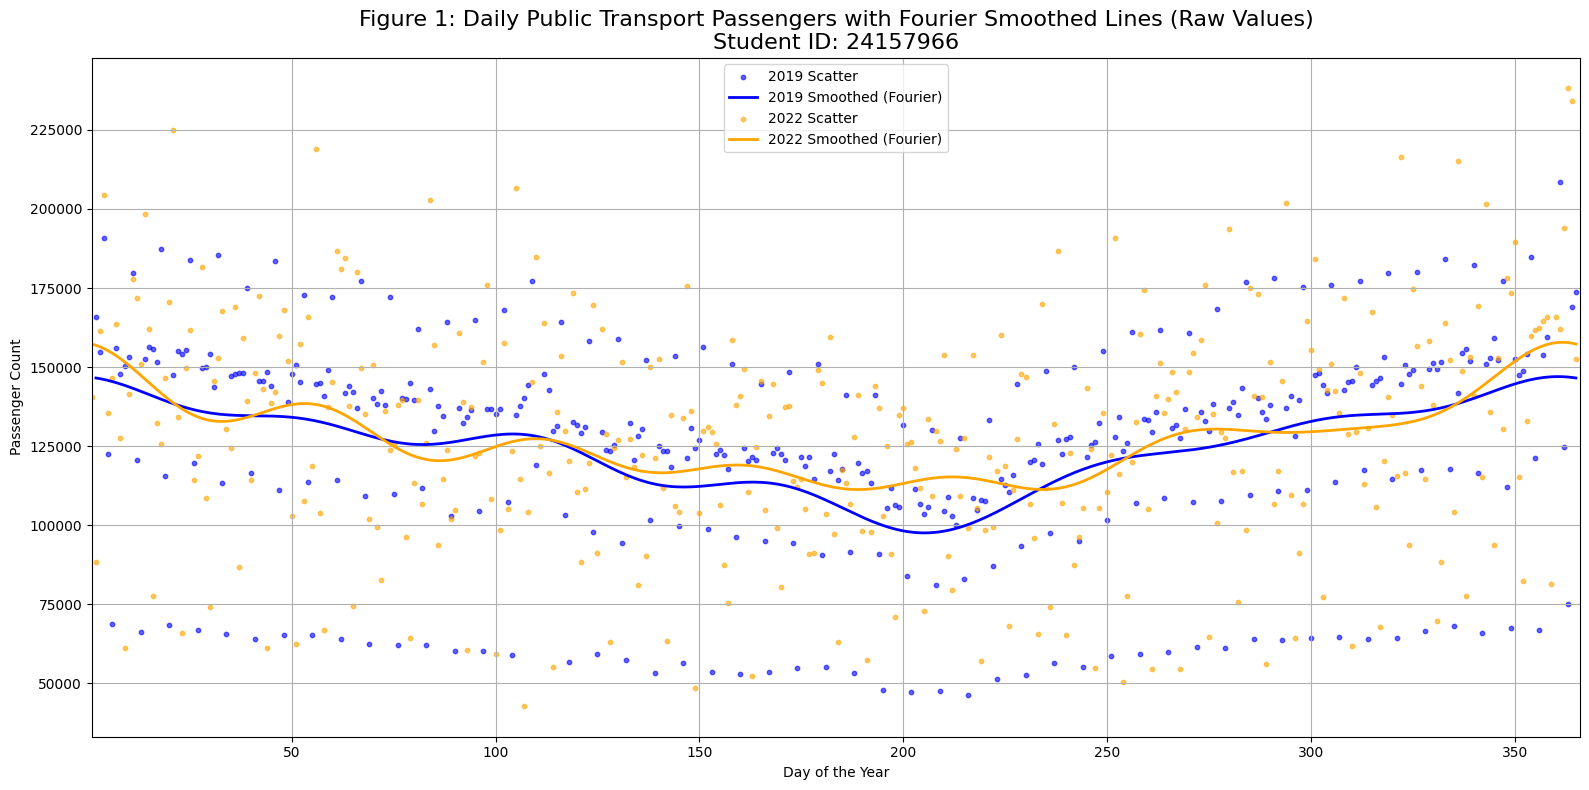

In [13]:
# -------------------------------
# Define scrfft function
# -------------------------------
def scrfft(xdata, ydata):
    sdata = np.argsort(xdata)
    xdatas = xdata[sdata]
    ydatas = ydata[sdata]

    xmin = np.min(xdata)
    xmax = np.max(xdata)
    ndata = len(xdata)
    x = (xmax - xmin) / (ndata - 1) * np.arange(ndata) + xmin
    y = np.interp(x, xdatas, ydatas)

    yf = 2.0 * np.fft.rfft(y) / (ndata + 1)
    a = np.real(yf)
    b = -np.imag(yf)
    a[0] = 0.5 * a[0]
    f = np.arange(len(a)) / (xmax - xmin)

    return f, a, b

# -------------------------------
# Define Fourier smoothing
# -------------------------------
def fourier_smooth(x, y, terms=8):
    f, a, b = scrfft(x, y)
    xmin, xmax = np.min(x), np.max(x)
    ndata = len(x)
    x_smooth = np.linspace(xmin, xmax, ndata)
    y_smooth = np.zeros_like(x_smooth)
    for i in range(terms):
        y_smooth += a[i] * np.cos(2 * np.pi * f[i] * x_smooth) + b[i] * np.sin(2 * np.pi * f[i] * x_smooth)
    return x_smooth, y_smooth

# -------------------------------
# Process 2019 data
# -------------------------------
data_2019["Total Passengers"] = (
    data_2019["Bus pax number peak"] +
    data_2019["Bus pax number offpeak"] +
    data_2019["Metro pax number peak"] +
    data_2019["Metro pax number offpeak"]
)
data_2019["Date"] = pd.to_datetime(data_2019["Date"])
data_2019["Day of Year"] = data_2019["Date"].dt.dayofyear
data_2019_sorted = data_2019.sort_values("Day of Year")
x_2019 = data_2019_sorted["Day of Year"].values
y_2019 = data_2019_sorted["Total Passengers"].values

# -------------------------------
# Process 2022 data using weighted trip counts
# -------------------------------
data_2022["Date and time"] = pd.to_datetime(data_2022["Date and time"])
data_2022["Day of Year"] = data_2022["Date and time"].dt.dayofyear

# Count trips by day and mode
daily_trips = data_2022.groupby(["Day of Year", "Mode"]).size().unstack(fill_value=0)

# Total trips per mode (observed)
total_trips_year = daily_trips.sum()

# Given yearly total passengers (real)
total_passengers_year = {
    'Bus': 39537756,
    'Tram': 0,
    'Metro': 7064380
}

# Estimate daily passengers per mode (with safe handling)
for mode in ['Bus', 'Tram', 'Metro']:
    if mode in daily_trips.columns:
        daily_trips[mode + " Passengers"] = (
            daily_trips[mode] / total_trips_year[mode] * total_passengers_year[mode]
        )
    else:
        daily_trips[mode + " Passengers"] = 0

# Compute total daily passengers
daily_trips['Total Passengers'] = daily_trips[['Bus Passengers', 'Tram Passengers', 'Metro Passengers']].sum(axis=1)
daily_trips = daily_trips.reset_index()
daily_trips_sorted = daily_trips.sort_values("Day of Year")

x_2022 = daily_trips_sorted["Day of Year"].values
y_2022 = daily_trips_sorted["Total Passengers"].values

# -------------------------------
# Apply Fourier smoothing
# -------------------------------
x2019_smooth, y2019_smooth = fourier_smooth(x_2019, y_2019)
x2022_smooth, y2022_smooth = fourier_smooth(x_2022, y_2022)

# -------------------------------
# Create x-values for plotting
# -------------------------------
x_days_2019 = x_2019
x_days_2022 = x_2022

x_smooth_days_2019 = np.linspace(x_days_2019.min(), x_days_2019.max(), len(y2019_smooth))
x_smooth_days_2022 = np.linspace(x_days_2022.min(), x_days_2022.max(), len(y2022_smooth))

# -------------------------------
# Plot (No Normalization)
# -------------------------------
fig, ax = plt.subplots(figsize=(16, 8))

# 2019 data
ax.scatter(x_days_2019, y_2019, s=10, label="2019 Scatter", alpha=0.6, color='blue')
ax.plot(x_smooth_days_2019, y2019_smooth, label="2019 Smoothed (Fourier)", linewidth=2, color='blue')

# 2022 data
ax.scatter(x_days_2022, y_2022, s=10, label="2022 Scatter", alpha=0.6, color='orange')
ax.plot(x_smooth_days_2022, y2022_smooth, label="2022 Smoothed (Fourier)", linewidth=2, color='orange')

# Customize plot
ax.set_title("Figure 1: Daily Public Transport Passengers with Fourier Smoothed Lines (Raw Values)\nStudent ID: 24157966", fontsize=16)
ax.set_xlabel("Day of the Year")
ax.set_ylabel("Passenger Count")
ax.set_xlim(1, 366)
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

In [14]:
sorted_data = data_2019.sort_values(by='Date')
sorted_data.head()  # View the 5 rows with the lowest values


,Date,Bus pax number peak,Bus price peak,Bus pax number offpeak,Bus price offpeak,Metro pax number peak,Metro price peak,Metro pax number offpeak,Metro price offpeak,Total Passengers,Day of Year
0,2019-01-02,26375,1.0,114394,1.0,5534,4.0,19470,4.0,165773,2
1,2019-01-03,29376,1.0,102094,1.0,5096,4.0,18317,4.0,154883,3
2,2019-01-04,26248,1.0,135108,1.0,5486,4.0,24030,4.0,190872,4
3,2019-01-05,10260,1.0,94709,1.0,1563,4.0,15849,4.0,122381,5
4,2019-01-06,9628,1.0,49432,1.0,1608,4.0,8007,4.0,68675,6


In [15]:
data_2022

,Date and time,Mode,Distance,Duration,Price,Day of Year
0,2022-08-01 17:31:00,Bus,1.3,0.04,1.0,213
1,2022-03-15 09:22:00,Bus,4.0,0.14,1.0,74
2,2022-05-06 15:24:00,Bus,1.3,0.04,1.0,126
3,2022-02-19 21:09:00,Bus,2.1,0.09,1.0,50
4,2022-12-20 11:23:00,Bus,2.4,0.09,1.0,354
...,...,...,...,...,...,...
19995,2022-01-03 09:24:00,Metro,4.0,0.04,4.0,3
19996,2022-11-18 14:26:00,Metro,4.9,0.09,8.0,322
19997,2022-10-21 16:20:00,Metro,1.7,0.03,4.0,294
19998,2022-05-31 18:39:00,Metro,4.4,0.08,8.0,151


In [16]:
sorted_data_2022 = data_2022.sort_values(by='Day of Year')
sorted_data_2022.head()  # View the 5 rows with the lowest values


,Date and time,Mode,Distance,Duration,Price,Day of Year
10301,2022-01-01 07:57:00,Metro,2.4,0.04,4.0,1
17779,2022-01-01 16:12:00,Metro,3.4,0.05,4.0,1
16559,2022-01-01 21:03:00,Metro,1.1,0.01,2.0,1
4049,2022-01-01 23:26:00,Bus,1.0,0.04,1.0,1
5669,2022-01-01 12:09:00,Bus,0.7,0.03,1.0,1


## Question 3.1 C

In [50]:
# Define the plotting function
def plot_bar_avgpax_weekdays(data_2019, data_2022, 
                             X_spring_2019, Y_summer_2019, Z_autumn_2019,
                             X_spring_2022, Y_summer_2022, Z_autumn_2022):
    data_2019['Date'] = pd.to_datetime(data_2019['Date'])
    data_2022['Date and time'] = pd.to_datetime(data_2022['Date and time'])

    data_2019['Total Passengers'] = (
        data_2019['Bus pax number peak'] + data_2019['Bus pax number offpeak'] +
        data_2019['Metro pax number peak'] + data_2019['Metro pax number offpeak']
    )
    data_2019['DayOfWeek_2019'] = data_2019['Date'].dt.day_name()

    avg_passengers_2019 = data_2019.groupby('DayOfWeek_2019')['Total Passengers'].mean().reindex([
        'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
    ])

    total_passengers_year = {'Bus': 39537756, 'Tram': 0, 'Metro': 7064380}
    data_2022['Day of Year'] = data_2022['Date and time'].dt.dayofyear
    data_2022['Weekday'] = data_2022['Date and time'].dt.day_name()
    daily_trips = data_2022.groupby(['Day of Year', 'Mode']).size().unstack(fill_value=0)
    total_trips_year = daily_trips.sum()

    for mode in ['Bus', 'Tram', 'Metro']:
        if mode in daily_trips.columns:
            daily_trips[mode + ' Passengers'] = (
                daily_trips[mode] / total_trips_year[mode] * total_passengers_year[mode]
            )
        else:
            daily_trips[mode + ' Passengers'] = 0

    daily_trips['Total Passengers'] = daily_trips[['Bus Passengers', 'Tram Passengers', 'Metro Passengers']].sum(axis=1)
    daily_trips = daily_trips.reset_index()
    weekday_lookup = data_2022.drop_duplicates('Day of Year')[['Day of Year', 'Weekday']]
    daily_trips = pd.merge(daily_trips, weekday_lookup, on='Day of Year', how='left')
    avg_passengers_2022 = daily_trips.groupby('Weekday')['Total Passengers'].mean().reindex([
        'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
    ])

    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    x = range(len(weekdays))
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(14, 7))
    bars_2019 = ax.bar([i - bar_width / 2 for i in x], avg_passengers_2019.values, width=bar_width,
                       label='2019', color='skyblue')
    bars_2022 = ax.bar([i + bar_width / 2 for i in x], avg_passengers_2022.values, width=bar_width,
                       label='2022', color='lightgreen')

    for bar in bars_2019:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 2000, f'{height:,.0f}',
                ha='center', va='bottom', fontsize=8)
    for bar in bars_2022:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 2000, f'{height:,.0f}',
                ha='center', va='bottom', fontsize=8)

    ax.set_title('Figure 2: Average Public Transport Passengers by Day (2019 vs 2022)', fontsize=15, pad=45)

    seasonal_text = (
        f"2019 - Spring: {X_spring_2019:.2f}%, Summer: {Y_summer_2019:.2f}%, Autumn: {Z_autumn_2019:.2f}%    |    "
        f"2022 - Spring: {X_spring_2022:.2f}%, Summer: {Y_summer_2022:.2f}%, Autumn: {Z_autumn_2022:.2f}%"
    )
    ax.annotate(seasonal_text, xy=(0.5, 1.02), xycoords='axes fraction', fontsize=11,
                ha='center', va='bottom', bbox=dict(boxstyle='round,pad=0.4', facecolor='lightyellow', edgecolor='gray'))

    ax.set_xlabel('Day of the Week')
    ax.set_ylabel('Average Number of Passengers')
    ax.set_xticks(x)
    ax.set_xticklabels(weekdays, rotation=45)
    ax.set_ylim(0, max(avg_passengers_2019.max(), avg_passengers_2022.max()) * 1.15)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    fig.text(0.5, 0.01, 'Student ID: 24157966', ha='center', fontsize=11)

    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()


## Question 3.1 D

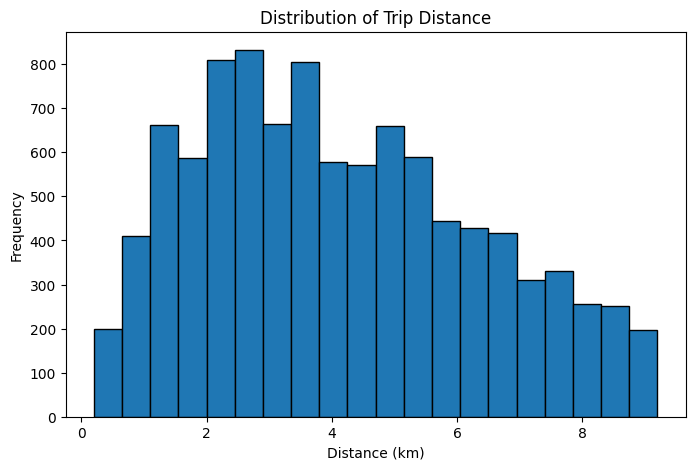

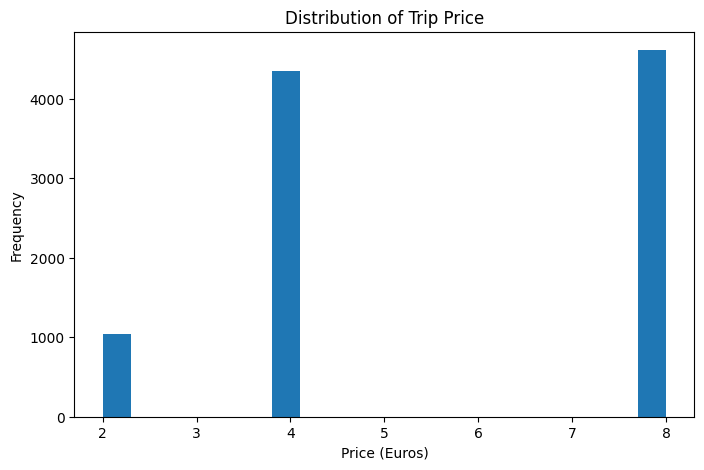

In [18]:
# Extract distance and price
dist = data_2022[data_2022["Mode"] == "Metro"]["Distance"]
price = data_2022[data_2022["Mode"] == "Metro"]["Price"]

# Plot distribution of Distance
plt.figure(figsize=(8,5))
plt.hist(dist, bins=20,edgecolor='black')
         
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Distance")
plt.show()

# Plot distribution of Price
plt.figure(figsize=(8,5))
plt.hist(price, bins=20)
plt.xlabel("Price (Euros)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Price")
plt.show()


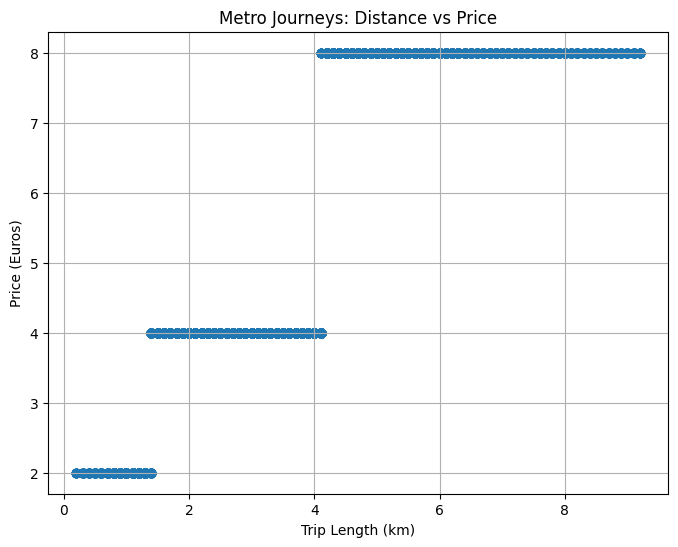

In [19]:

# Filter only Metro journeys
metro_df = data_2022[data_2022["Mode"].str.lower() == "metro"]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(metro_df["Distance"], metro_df["Price"])
plt.xlabel("Trip Length (km)")
plt.ylabel("Price (Euros)")
plt.title("Metro Journeys: Distance vs Price")
plt.grid(True)

plt.show()

In [20]:
def plot_metro_linear_fit(df):
    """
    Creates a scatter plot of Price vs Distance for all Metro trips,
    fits a linear regression, draws the regression line,
    and displays the linear equation on the figure.
    """

    # Filter Metro journeys
    metro = df[df["Mode"].str.lower() == "metro"]

    # Prepare X and y
    X = metro[["Distance"]].values
    y = metro["Price"].values

    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)

    # Generate smooth line for plotting
    xx = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    yy = model.predict(xx)

    # Extract coefficients
    slope = model.coef_[0]
    intercept = model.intercept_

    # Create equation string
    equation = f"Price = {slope:.3f} × Distance + {intercept:.3f}"

    # Plot
    plt.figure(figsize=(9, 6))
    plt.scatter(X, y, alpha=0.6, label="Metro journeys (2022)", color="orange")
    plt.plot(xx, yy, color="red", linewidth=2, label="Linear regression fit")
    
    student_id = "24157966"
    plt.text(4.5, 0, f'Student ID: {student_id}', ha='center', fontsize=10)
    
    # Add labels and title
    plt.xlabel("Trip Length (km)")
    plt.ylabel("Price (Euros)")
    plt.title("Figure 3: Metro Journeys 2022: Price vs Trip Length with Linear Fit")
    plt.grid(True)
    plt.legend()
    

    # Display equation on plot
    plt.text(
        0.05, 0.95,
        equation,
        transform=plt.gca().transAxes,
        fontsize=12,
        verticalalignment='top',
        bbox=dict(facecolor='white', alpha=0.8)
    )

    

    plt.show()

    return model


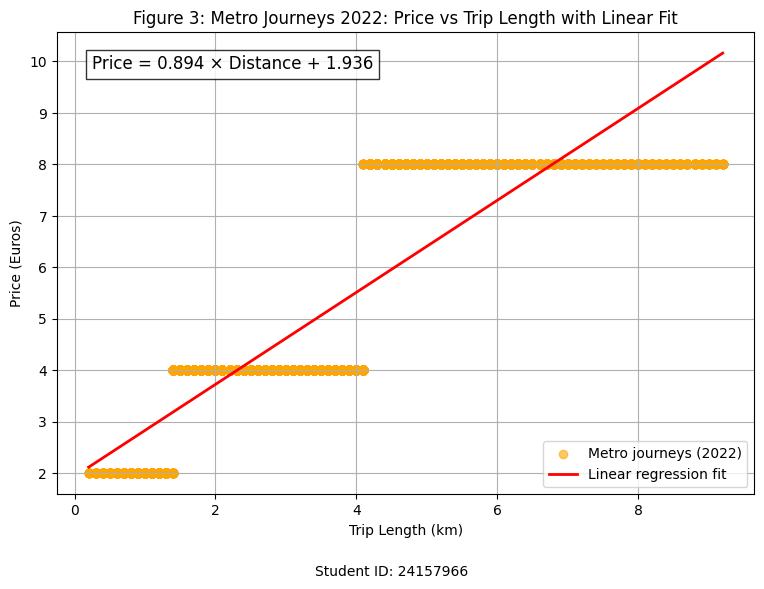

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
plot_metro_linear_fit(data_2022)

## Question 3.2 

In [22]:
data_2019

,Date,Bus pax number peak,Bus price peak,Bus pax number offpeak,Bus price offpeak,Metro pax number peak,Metro price peak,Metro pax number offpeak,Metro price offpeak,Total Passengers,Day of Year
0,2019-01-02,26375,1.0,114394,1.0,5534,4.0,19470,4.0,165773,2
1,2019-01-03,29376,1.0,102094,1.0,5096,4.0,18317,4.0,154883,3
2,2019-01-04,26248,1.0,135108,1.0,5486,4.0,24030,4.0,190872,4
3,2019-01-05,10260,1.0,94709,1.0,1563,4.0,15849,4.0,122381,5
4,2019-01-06,9628,1.0,49432,1.0,1608,4.0,8007,4.0,68675,6
...,...,...,...,...,...,...,...,...,...,...,...
356,2019-12-27,35535,1.0,140798,1.0,5612,4.0,26569,4.0,208514,361
357,2019-12-28,9827,1.0,96838,1.0,1662,4.0,16422,4.0,124749,362
358,2019-12-29,9923,1.0,55258,1.0,1587,4.0,8483,4.0,75251,363
359,2019-12-30,31319,1.0,112178,1.0,5613,4.0,20036,4.0,169146,364


In [23]:
data_2022.sort_values(by='Date and time')

,Date and time,Mode,Distance,Duration,Price,Day of Year
10564,2022-01-01 06:56:00,Metro,4.0,0.08,4.0,1
3924,2022-01-01 07:27:00,Bus,2.1,0.11,1.0,1
10301,2022-01-01 07:57:00,Metro,2.4,0.04,4.0,1
16142,2022-01-01 08:18:00,Metro,5.3,0.07,8.0,1
14868,2022-01-01 08:37:00,Metro,2.3,0.04,4.0,1
...,...,...,...,...,...,...
5086,2022-12-31 22:16:00,Bus,0.7,0.03,1.0,365
18178,2022-12-31 22:30:00,Metro,4.9,0.05,8.0,365
15082,2022-12-31 22:55:00,Metro,0.6,0.01,2.0,365
2397,2022-12-31 22:58:00,Bus,1.1,0.04,1.0,365


In [24]:
def transport_type_seasonwise_plot(data_2019, data_2022):
    # Process 2019 data
    data_2019['Date'] = pd.to_datetime(data_2019['Date'])
    data_2019['Total_Bus'] = data_2019['Bus pax number peak'] + data_2019['Bus pax number offpeak']
    data_2019['Total_Metro'] = data_2019['Metro pax number peak'] + data_2019['Metro pax number offpeak']
    total_2019_bus = data_2019['Total_Bus'].sum()
    total_2019_metro = data_2019['Total_Metro'].sum()
    total_2019_all = total_2019_bus + total_2019_metro

    percent_2019 = {
        'Tram': 0.0,
        'Train': 0.0,
        'Bus': (total_2019_bus / total_2019_all) * 100,
        'Metro': (total_2019_metro / total_2019_all) * 100
    }

    # Process 2022 data
    data_2022['Date and time'] = pd.to_datetime(data_2022['Date and time'])
    mode_counts = data_2022['Mode'].value_counts()
    total_2022_all = mode_counts.sum()
    percent_2022 = {
        'Tram': (mode_counts.get('Tram', 0) / total_2022_all) * 100,
        'Train': (mode_counts.get('Train', 0) / total_2022_all) * 100,
        'Bus': (mode_counts.get('Bus', 0) / total_2022_all) * 100,
        'Metro': (mode_counts.get('Metro', 0) / total_2022_all) * 100
    }

    # Create transport percentage DataFrame
    transport_df = pd.DataFrame({'2019': percent_2019, '2022': percent_2022})

    # Seasonal breakdown 2019
    spring_months, summer_months, autumn_months = [3, 4, 5], [6, 7, 8], [9, 10, 11]
    data_2019['Month'] = data_2019['Date'].dt.month
    spring_total = data_2019[data_2019['Month'].isin(spring_months)][['Total_Bus', 'Total_Metro']].sum().sum()
    summer_total = data_2019[data_2019['Month'].isin(summer_months)][['Total_Bus', 'Total_Metro']].sum().sum()
    autumn_total = data_2019[data_2019['Month'].isin(autumn_months)][['Total_Bus', 'Total_Metro']].sum().sum()
    total_journeys_2019 = total_2019_all
    X_spring_2019 = (spring_total / total_journeys_2019) * 100
    Y_summer_2019 = (summer_total / total_journeys_2019) * 100
    Z_autumn_2019 = (autumn_total / total_journeys_2019) * 100

    # Seasonal breakdown 2022
    data_2022['Month'] = data_2022['Date and time'].dt.month
    spring_total_2022 = len(data_2022[data_2022['Month'].isin(spring_months)])
    summer_total_2022 = len(data_2022[data_2022['Month'].isin(summer_months)])
    autumn_total_2022 = len(data_2022[data_2022['Month'].isin(autumn_months)])
    total_journeys_2022 = len(data_2022)
    X_spring_2022 = (spring_total_2022 / total_journeys_2022) * 100
    Y_summer_2022 = (summer_total_2022 / total_journeys_2022) * 100
    Z_autumn_2022 = (autumn_total_2022 / total_journeys_2022) * 100

    # Create plot
    fig, ax = plt.subplots(figsize=(10, 6))
    modes = transport_df.index
    x = range(len(modes))
    bar_width = 0.35
    bars_2019 = ax.bar([i - bar_width / 2 for i in x], transport_df['2019'], width=bar_width, label='2019')
    bars_2022 = ax.bar([i + bar_width / 2 for i in x], transport_df['2022'], width=bar_width, label='2022')

    for bar in bars_2019 + bars_2022:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom')

    ax.set_title('Figure 4: Percentage of Journeys by Mode (2019 vs 2022)')
    ax.set_xlabel('Mode of Transport')
    ax.set_ylabel('Percentage of Journeys (%)')
    ax.set_xticks(list(x))
    ax.set_xticklabels(modes)
    ax.set_ylim(0, 100)
    ax.legend()
    plt.text(1.5, -15, 'Student ID: 24157966', ha='center', fontsize=10)
    plt.tight_layout()
    plt.show()

    return {
        "Spring (%) for 2019": round(X_spring_2019, 2),
        "Summer (%) for 2019": round(Y_summer_2019, 2),
        "Autumn (%) for 2019": round(Z_autumn_2019, 2),
        "Spring (%) for 2022": round(X_spring_2022, 2),
        "Summer (%) for 2022": round(Y_summer_2022, 2),
        "Autumn (%) for 2022": round(Z_autumn_2022, 2)
    }

#### The 2022 dataset used in this analysis contains 20,000 sampled journeys and is statistically representative of all public transport use in 2022. Each row represents one journey. Therefore, mode shares and seasonal trends are calculated using percentage-based methods rather than absolute totals.

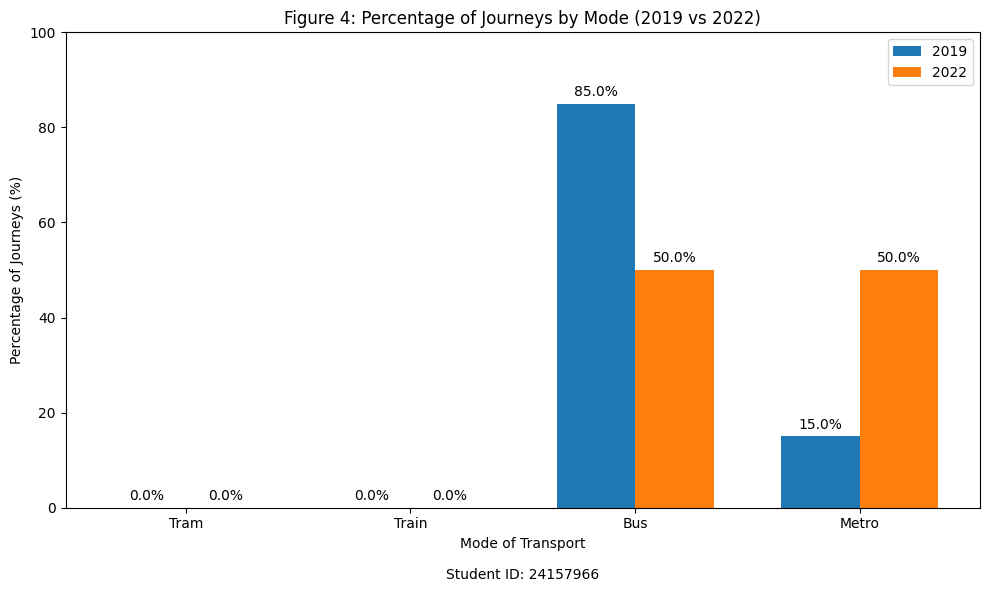

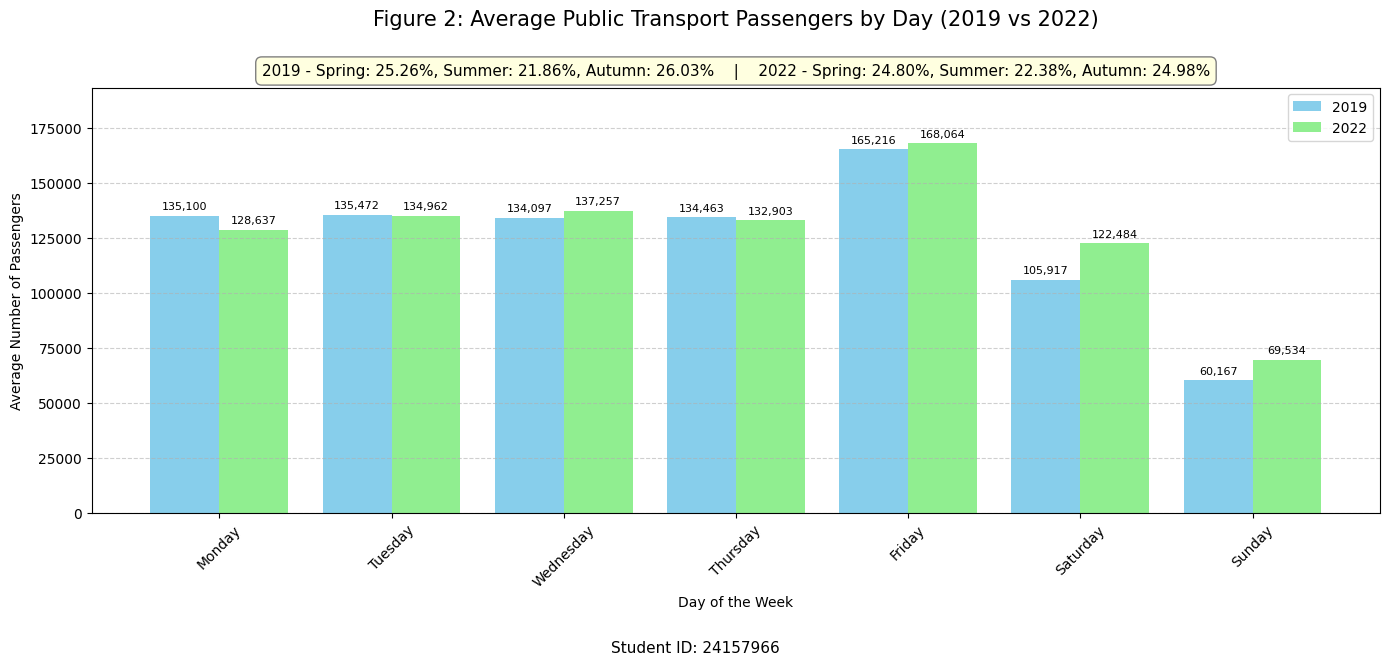

In [51]:
seasonal_percentages = transport_type_seasonwise_plot(data_2019, data_2022)

plot_bar_avgpax_weekdays(
    data_2019,
    data_2022,
    X_spring_2019=seasonal_percentages["Spring (%) for 2019"],
    Y_summer_2019=seasonal_percentages["Summer (%) for 2019"],
    Z_autumn_2019=seasonal_percentages["Autumn (%) for 2019"],
    X_spring_2022=seasonal_percentages["Spring (%) for 2022"],
    Y_summer_2022=seasonal_percentages["Summer (%) for 2022"],
    Z_autumn_2022=seasonal_percentages["Autumn (%) for 2022"]
)


